In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load model dan label
model = load_model("expression_model.keras", compile=False)
with open("labels.json", "r") as f:
    class_indices = json.load(f)
labels = {v: k for k, v in class_indices.items()}

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

frame_history = []

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret: break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) > 0:
        current_frame_pred = [0] * len(labels)  # Untuk menyimpan prediksi per frame
        
        for (x,y,w,h) in faces:
            roi = gray[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (48,48)).reshape(1,48,48,1) / 255.0
            pred = model.predict(roi_resized)
            
            confidence = np.max(pred)
            predicted_index = np.argmax(pred)
            predicted_label = labels[predicted_index]
            label = f"{labels[np.argmax(pred)]} ({confidence*100:.1f}%)"
            
            # Simpan ke history
            current_frame_pred[predicted_index] = confidence

            # Tampilkan di frame
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        frame_history.append(current_frame_pred)
        
    cv2.imshow("Facial Expression Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

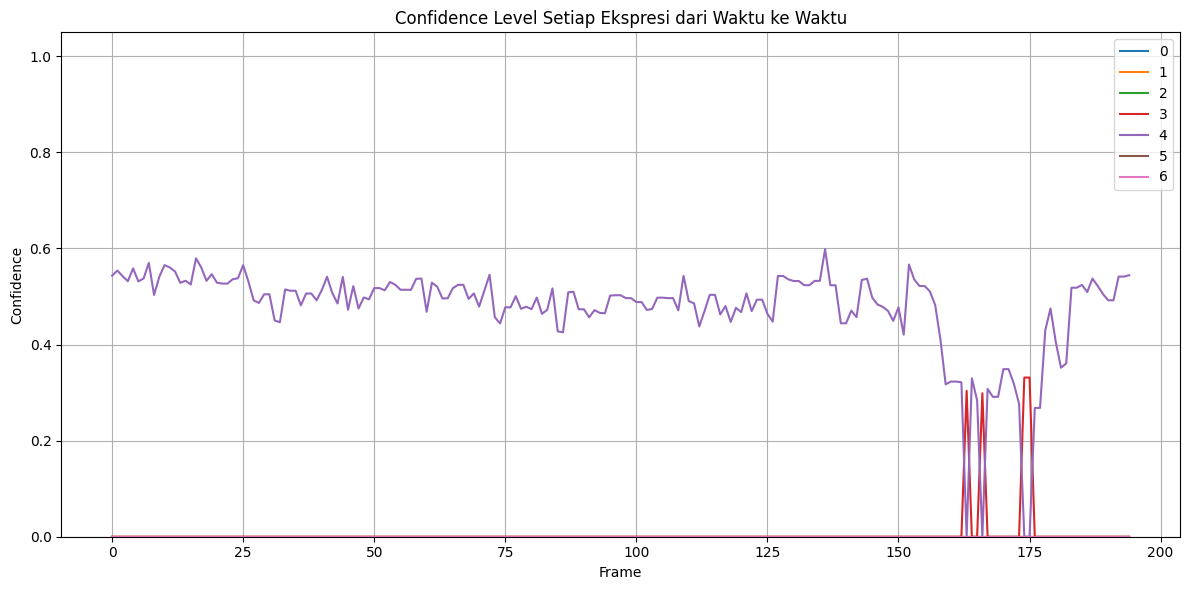

In [7]:
if len(frame_history) > 0:
    frame_history = np.array(frame_history)
    frame_indices = np.arange(len(frame_history))

plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.plot(frame_indices, frame_history[:, i], label=label)

plt.title("Confidence Level Setiap Ekspresi dari Waktu ke Waktu")
plt.xlabel("Frame")
plt.ylabel("Confidence")
plt.ylim([0, 1.05])
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()
